<a href="https://colab.research.google.com/github/jyotikashyap85399-tech/Image-classification/blob/main/initial_EDA_quora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train (2).csv')
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
28359,28359,52599,52600,"I have sent some contact details to my client,...","I have sent some contact details to my client,...",1
388916,388916,46860,55618,How do I create my blog on Quora?,How can I create a blog on Quora?,1
167908,167908,13184,28798,How much time will spotify take to land in India?,Why hasn't Daniel Ek brought Spotify to India?,1
314911,314911,439733,439734,Where do hackers learn to hack?,Where do black hat hackers and white hat hacke...,1
329795,329795,456483,142043,Why do people fear society?,Why are people so fearful?,0
46617,46617,83364,83302,Does the Indian education system need a reform...,Should the education system in India change?,1
355860,355860,485103,374455,"Is it ""lots of love"" or ""loads of love""?","Is this correct grammar ""No one else will ever...",0
398228,398228,531443,531444,Can you legally download movie trailers?,Can I legally download a movie trailer?,1
237811,237811,86282,349047,How do you translate 意思意思 into english?,How will you translate 福州一中学校 into English?,0
316821,316821,441934,441935,What are some best Android Apps that are not a...,What are some of the best courses for Android ...,0


In [7]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [9]:
df.duplicated().sum() #duplicate rows

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

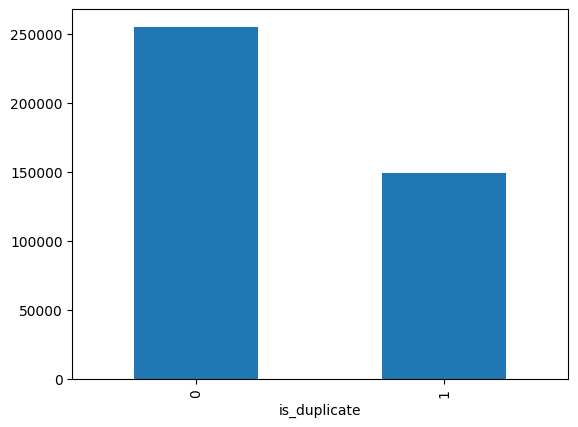

In [10]:
# distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
# repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


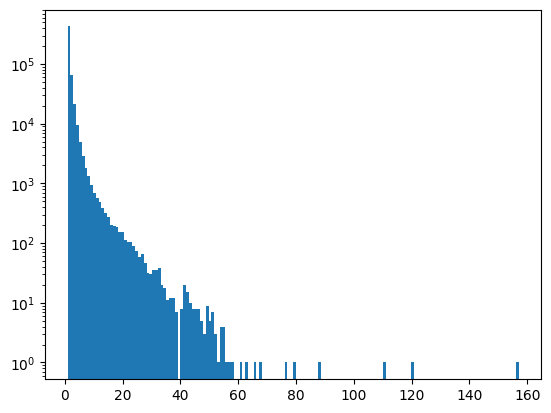

In [20]:
# repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [21]:
new_df = df.sample(30000)

In [22]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [23]:
new_df.duplicated().sum()

np.int64(0)

In [24]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
158693,What is the best way to earn 5000 in a month?,How do I earn 30000 in a month?
225350,How do I factorise x^2-1-2y-y^2 ? It is in our...,How do I factorise: x^2 – y^2 – 2y – 1?
308347,What actually software engineer do in a softwa...,What are the best companies to work for as a s...
250302,Who is Jill Stein?,Will everyone vote for Jill Stein?
160168,Why are super smart people so quiet?,Why are some very smart people so quiet?


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])
#merge text
cv = CountVectorizer(max_features = 3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [26]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [27]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [28]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
158693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
temp_df.shape

(30000, 6001)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7405

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7278333333333333